In [35]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# Note: My latest version of Pandas is always showing a FutureWarning. Turning off Warnings for brevity:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [36]:
redfin = pd.read_csv('../3_data_cleaned/redfin_market_tracker_LI_cleanup_S.csv')
redfin.head()

,median_list_price,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,...,"region_Nassau County, NY","region_Suffolk County, NY",property_type_All Residential,property_type_Condo/Co-op,property_type_Multi-Family (2-4 Unit),property_type_Single Family Residential,property_type_Townhouse,period_begin,period_end,label
0,369900.0,256.0,180.0,225.0,694.0,2.7,57.0,0.968593,0.093750,0.165706,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,736542,736572,253750.0
1,399000.0,13.0,13.0,17.0,65.0,5.0,84.0,0.955198,0.230769,0.138462,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,736726,736753,395000.0
2,520500.0,13.0,14.0,12.0,27.0,2.1,21.0,1.023050,0.384615,0.148148,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,738064,738094,475000.0
3,599000.0,19.0,15.0,18.0,19.0,1.0,29.0,1.031189,0.578947,0.052632,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,738733,738763,540000.0
4,349997.0,823.0,776.0,2335.0,8311.0,10.1,141.0,0.948178,0.100851,0.178679,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,734959,734988,300000.0


In [37]:
redfin.info()
median_sale_mean = redfin['label'].mean()
median_sale_std = redfin['label'].std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   median_list_price                        1406 non-null   float64
 1   homes_sold                               1406 non-null   float64
 2   pending_sales                            1406 non-null   float64
 3   new_listings                             1406 non-null   float64
 4   inventory                                1406 non-null   float64
 5   months_of_supply                         1406 non-null   float64
 6   median_dom                               1406 non-null   float64
 7   avg_sale_to_list                         1406 non-null   float64
 8   sold_above_list                          1406 non-null   float64
 9   price_drops                              1406 non-null   float64
 10  off_market_in_two_weeks                  1406 no

In [38]:
y = redfin['label']
X = redfin.drop(columns='label')

X_std = zscore(X)
y_std = zscore(y)
print(X_std)
print(y_std)


      median_list_price  homes_sold  pending_sales  new_listings  inventory  \
0             -1.015265   -0.389170      -0.429066     -0.550728  -0.572706   
1             -0.751073   -0.848442      -0.805829     -0.840310  -0.811630   
2              0.351998   -0.848442      -0.803573     -0.847271  -0.826064   
3              1.064681   -0.837102      -0.801317     -0.838918  -0.829103   
4             -1.195960    0.682465       0.915550      2.386855   2.320593   
...                 ...         ...            ...           ...        ...   
1401          -0.569497   -0.564941      -0.690769     -0.616163  -0.363790   
1402          -0.975772   -0.527140      -0.505772     -0.485294  -0.497496   
1403           0.156804    0.200513       0.689944      1.618349   1.037468   
1404           1.064681   -0.867342      -0.832902     -0.857017  -0.829863   
1405          -0.297134    0.497244       0.202633      0.143989   0.911358   

      months_of_supply  median_dom  avg_sale_to_lis

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(703, 21)
(703, 21)
(703,)
(703,)


Linear Regression Model (With Lasso, Ridge, and Elastic Net Regression)

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.5259031398033078
[LR] R2: 0.7423920526888308


In [41]:
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print('[Lasso] Root Mean Squared Error: {0}'.format(lasso_rmse))
print('[Lasso] R2: {0}'.format(lasso_r2))

[Lasso] Root Mean Squared Error: 0.5426649519452543
[Lasso] R2: 0.7257091775130159


In [42]:
ridge_model = RidgeCV(cv=5)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print('[Ridge] Root Mean Squared Error: {0}'.format(ridge_rmse))
print('[Ridge] R2: {0}'.format(ridge_r2))

[Ridge] Root Mean Squared Error: 0.5273283490870324
[Ridge] R2: 0.7409939141490443


In [43]:
en_model = ElasticNetCV(cv=5)
en_model.fit(X_train, y_train)
y_en_pred = en_model.predict(X_test)
en_rmse = mean_squared_error(y_test, y_en_pred, squared=False)
en_r2 = r2_score(y_test, y_en_pred)

print('[EN] Root Mean Squared Error: {0}'.format(en_rmse))
print('[EN] R2: {0}'.format(en_r2))

[EN] Root Mean Squared Error: 0.5430669551292036
[EN] R2: 0.7253026407513815


KNN Model

In [44]:
param_grid_KNN = dict(n_neighbors = list(range(1,10)))
param_grid_KNN 

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [45]:
print('Running Grid Search...')
model_KNN = KNeighborsRegressor()
grid_KNN = GridSearchCV(model_KNN, param_grid_KNN, cv=5)
grid_search_KNN = grid_KNN.fit(X_train, y_train)
print('Done')
print(grid_search_KNN.best_params_)

Running Grid Search...
Done
{'n_neighbors': 4}


In [46]:
best_model_KNN = KNeighborsRegressor(n_neighbors=7)
best_model_KNN.fit(X_train, y_train)
y_KNN_pred = best_model_KNN.predict(X_test)
KNN_rmse = mean_squared_error(y_test, y_KNN_pred, squared=False)
KNN_r2 = r2_score(y_test, y_KNN_pred)

print('[KNN] Root Mean Squared Error: {0}'.format(KNN_rmse))
print('[KNN] R2: {0}'.format(KNN_r2))

[KNN] Root Mean Squared Error: 0.5093533237602227
[KNN] R2: 0.7583504344856381


### Fernando: This is the best model for this dataset. Graphing

In [47]:
redfin['K-Neighbors'] = best_model_KNN.predict(X_std)
print(redfin['K-Neighbors'])

# We have the predictions as Z-Scores, need to convert back to actual values
redfin['K-Neighbors'] = redfin['K-Neighbors'].apply(lambda x: x * median_sale_std + median_sale_mean)
print(redfin['K-Neighbors'])


0      -1.227391
1      -0.276165
2       0.396076
3       0.365476
4      -0.887924
          ...   
1401   -1.192727
1402   -1.307477
1403   -0.028234
1404    1.430257
1405    0.016351
Name: K-Neighbors, Length: 1406, dtype: float64
0       260184.757357
1       402342.463156
2       502806.767932
3       498233.712807
4       310917.087650
            ...      
1401    265365.171366
1402    248216.214647
1403    439394.927766
1404    657361.740359
1405    446058.011991
Name: K-Neighbors, Length: 1406, dtype: float64


In [48]:
print(median_sale_mean)
print(median_sale_std)

443614.4423897582
149446.7707466961


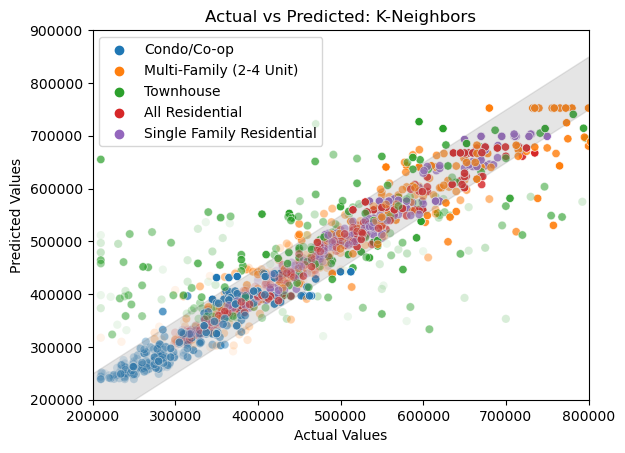

In [49]:
from plot_redfin import plotRedfinScatter
plot = plotRedfinScatter('label', 'K-Neighbors', redfin)
plot.set(xlabel='Actual Values', ylabel='Predicted Values', title='Actual vs Predicted: K-Neighbors')
plot.fill_between([200000, 800000], [150000, 750000], [250000, 850000],  color='gray', alpha=0.2)

Decision Tree Model

In [11]:
param_grid_DT = dict(max_depth = [2, 4, 8, 16])
param_grid_DT

{'max_depth': [2, 4, 8, 16]}

In [12]:
print('Running Grid Search...')
model_DT = DecisionTreeRegressor()
grid_DT = GridSearchCV(model_DT, param_grid_DT, cv=5)
grid_search_DT = grid_DT.fit(X_train, y_train)
print('Done')
print(grid_search_DT.best_params_)

Running Grid Search...
Done
{'max_depth': 4}


In [13]:
best_model_DT = DecisionTreeRegressor(max_depth=4)
best_model_DT.fit(X_train, y_train)
y_DT_pred = best_model_DT.predict(X_test)
DT_rmse = mean_squared_error(y_test, y_DT_pred, squared=False)
DT_r2 = r2_score(y_test, y_DT_pred)

print('[DT] Root Mean Squared Error: {0}'.format(DT_rmse))
print('[DT] R2: {0}'.format(DT_r2))

[DT] Root Mean Squared Error: 0.5251534431900227
[DT] R2: 0.7221372727942366


Support Vector Machine Model

In [16]:
model_SV = SVR(kernel='linear')
model_SV.fit(X_train, y_train)
y_SV_pred = model_SV.predict(X_test)
SV_rmse = mean_squared_error(y_test, y_SV_pred, squared=False)
SV_r2 = r2_score(y_test, y_SV_pred)

print('[SV] Root Mean Squared Error: {0}'.format(SV_rmse))
print('[SV] R2: {0}'.format(SV_r2))

[SV] Root Mean Squared Error: 0.5528130409481804
[SV] R2: 0.692096646858672


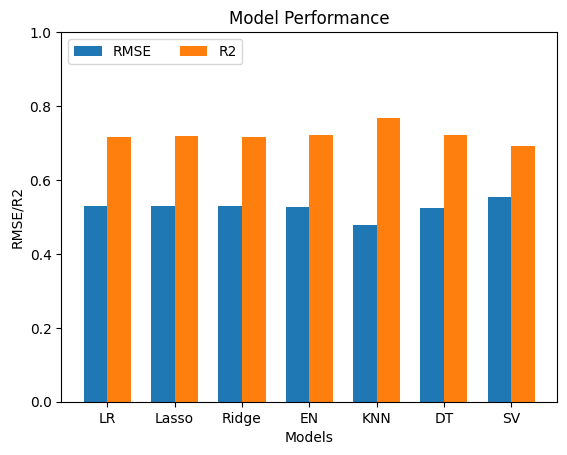

In [23]:
RMSE_Results = [lr_rmse, lasso_rmse, ridge_rmse, en_rmse, KNN_rmse, DT_rmse, SV_rmse]
R2_Results = [lr_r2, lasso_r2, ridge_r2, en_r2, KNN_r2, DT_r2, SV_r2]
labels = ['LR', 'Lasso', 'Ridge', 'EN', 'KNN', 'DT', 'SV']

rg= np.arange(7)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

The K-Nearest Neighbors model has the best performance. It has the lowest root mean squared error and the highest r2 value.